In [11]:
# Standard python packages
import os
import sys
from pathlib import Path

# Other package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [13]:
data_folder = Path("../data/processed")
income_df = pd.read_csv(data_folder / "X19_INCOME.csv", index_col="GEOID")
income_total = income_df["PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS): Total: Total population -- (Estimate)"]

In [14]:
categories = ["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Doctorate degree: Population 25 years and over -- (Estimate)"]

edu_df = pd.read_csv(data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv", index_col="GEOID")
edu_deg = edu_df[categories].sum(axis=1)

income_edu = pd.concat([income_total, edu_deg], axis=1)
income_edu.columns = ["Per captia income", "Bachelor's or higher"]

In [15]:
income_edu_small = income_edu[:]
X = income_edu_small["Per captia income"]
y = income_edu_small["Bachelor's or higher"]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(len(X_train))

12728


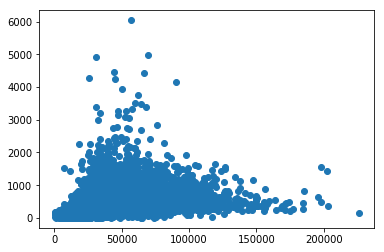

In [16]:
plt.scatter(X, y)

In [17]:
model = XGBClassifier(verbose=True)
model.fit(X_train[:, np.newaxis], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [18]:
y_pred = model.predict(X_test[:, np.newaxis])
print(y_pred)

[197   0 228 ... 197 490 538]


In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

SyntaxError: invalid syntax (<ipython-input-19-4ad09a98bfc1>, line 2)

In [ ]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.show